In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\dell'

In [3]:
#To laod Dataset 
df=pd.read_csv("insurance.csv")

In [4]:
#to show first 5 records
df.head()

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

In [5]:
#bmi : body mass index 
#sex :  0 : female   1 : male
#smoker : no : 0   yes : 1
#region : east west north south 
'''
east   0
north  1
south  2
west   3
'''

'\neast   0\nnorth  1\nsouth  2\nwest   3\n'

In [6]:
#how many rows and columns in given dataset
df.shape

(1338, 8)

In [7]:
#here output variable means target variable : categorical type 
#given 2 classes : 1 means yes and 0 means no
#to predict , customer claim(medi claim) for insurance or not in the 
#basis of given inputs 

In [8]:
#EDA process (data cleaning process)
#first check null values in each column 
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [9]:
#cross check , to check datatypes of each columns
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

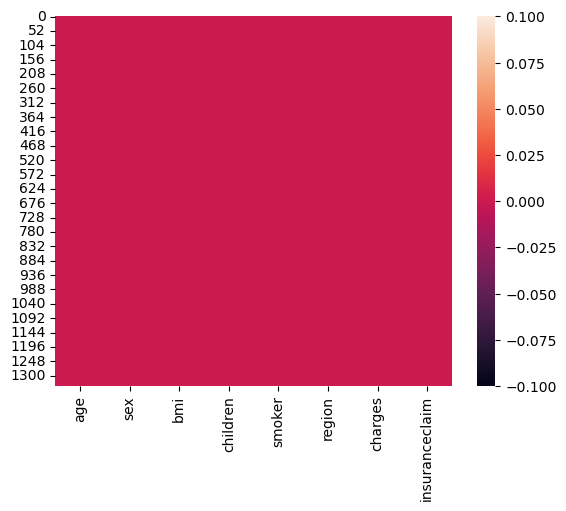

In [10]:
#visualize null values 
sns.heatmap(df.isnull())
plt.show()

In [11]:
#step 2 of EDA : To check duplicates rows /records
df.duplicated().sum()

1

In [12]:
#to delete duplicates records permanently in given dataset
df.drop_duplicates(inplace=True)

In [13]:
#Again To check duplicates rows /records
df.duplicated().sum()

0

In [14]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [15]:
#how many categories in output variable insuranceclaim 
df['insuranceclaim'].unique()

array([1, 0], dtype=int64)

In [16]:
#How many samples in 1's and 0's  in insuranceclaim column
df['insuranceclaim'].value_counts()

1    782
0    555
Name: insuranceclaim, dtype: int64

In [17]:
#How many samples in 1's and 0's  in insuranceclaim column in visualize 
sns.countplot(data=df,x="insuranceclaim")

plt.show()

In [18]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [19]:
df.head()

age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1

In [20]:
#How many male and female n this dataset
df['sex'].value_counts()

1    675
0    662
Name: sex, dtype: int64

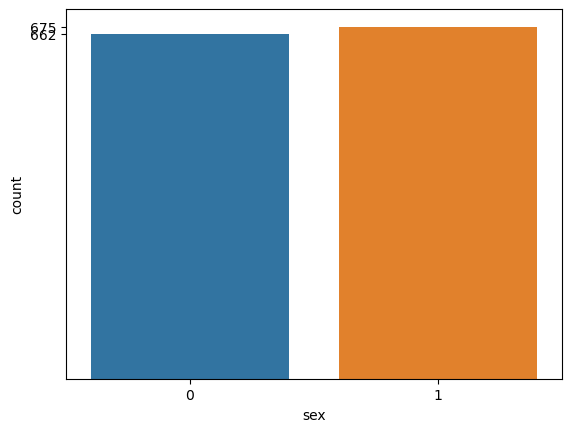

In [21]:
sns.countplot(data=df,x="sex")
f=df['sex'].value_counts()
plt.yticks(f)
plt.show()

In [22]:
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [23]:
df['smoker'].value_counts()

0    1063
1     274
Name: smoker, dtype: int64

In [24]:
df['region'].value_counts()

2    364
3    325
1    324
0    324
Name: region, dtype: int64

In [25]:
#separate input and output from given dataset 
X=df.drop("insuranceclaim",axis=1) #input select
Y=df["insuranceclaim"] #output select

In [26]:
X.head() 

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [27]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [28]:
#train test split : inbuilt function train_test_split()
from sklearn.model_selection import train_test_split

#split 70%-30%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                               random_state=1)

In [29]:
X_train.shape,Y_train.shape

((935, 7), (935,))

In [30]:
X_test.shape,Y_test.shape

((402, 7), (402,))

In [31]:
#apply scaling on input X_train and X_test 
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()

#fit_transform() inbuilt method of StandardScaler class  , which
#apply on X_train(70% training input)
#transform() inbuilt method of StandardScaler class  , which
#apply on X_test(30% testing input)
X_train=ss.fit_transform(X_train) #converts into numpy 2D array
X_test=ss.transform(X_test) #converts into numpy 2D array

In [32]:
X_train

array([[ 0.76935907, -1.05611771, -0.54584829, ..., -0.53158148,
        -1.38997482,  0.97973397],
       [ 1.34169182, -1.05611771, -0.57768002, ..., -0.53158148,
        -0.48304777, -0.11634023],
       [ 1.5563166 ,  0.94686415,  0.91841121, ..., -0.53158148,
         1.33080632,  1.16614713],
       ...,
       [-1.23380557,  0.94686415,  0.5280537 , ..., -0.53158148,
         0.42387927, -0.97698935],
       [ 0.05394313, -1.05611771, -1.40698031, ...,  1.88117914,
         0.42387927,  0.47286216],
       [ 1.41323342,  0.94686415,  1.76278969, ...,  1.88117914,
         0.42387927,  2.88193206]])

In [33]:
#Apply classification algorithm on this dataset
#1. use Logistic Regression : work on sigmoid function or also known as
#logit function , its return probability's value (0-1)

from sklearn.linear_model import LogisticRegression

In [34]:
#create the objetc of LogisticRegression class
lr=LogisticRegression()

In [35]:
#to train the model with 70% training data (X_train,Y_train) using 
#LogisticRegression algorithm , use inbuilt method fit() 
lr.fit(X_train,Y_train)

LogisticRegression()

In [36]:
#Test the model with 30% data , use inbuilt method predict() of
#LogisticRegression class : formula =1/(1+exp(-X_test))
Y_pred=lr.predict(X_test)

In [37]:
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [38]:
#create a dictionary 
dict={'Actual output':Y_test,'Predicted Output':Y_pred}
#converts dictionary dict into dataframe
df1=pd.DataFrame(dict)
df1

Actual output  Predicted Output
629               1                 1
1087              1                 1
283               1                 1
790               1                 1
594               1                 1
...             ...               ...
924               0                 0
873               1                 0
731               0                 0
363               0                 0
10                1                 1

[402 rows x 2 columns]

In [39]:
#confusion matrix print : It is used to show how many correct answer and 
#how many wrong answer  in the case of classification algorithm 
#There are 2 classes in this dataset (insurance.csv) in target variable 
#1 and 0 means binary classifier 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

[[147  25]
 [ 21 209]]


In [40]:
#find scores (accuracy ,recall,precision,F1-score)
#accuracy score=(TP+TN)/(TP+TN+FP+FN)
#recall score=TP/(TP+FN)
#precision Score=TP/(TP+FP)
#F1-score :  2*Recall*Precision/(Recall+Precision)

#if see report of classification problem : then use inbuilt class
#classification_report : inbuilt inner class -->define in metrics outer
#class -->define in sklearn package 
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



In [41]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [42]:
#DecisionTreeClassifer : Second algorithm of classification 
#DecisionTreeClassifer is help to select important features(inputs) to
#find the output .
#There are 2 types of method used in Decision tree classifier :-
#1. gini index     2. Entropy 

#use inbuilt inner class DecisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 

In [43]:
#create object of inbuilt class DecisionTreeClassifier 
dt=DecisionTreeClassifier(random_state=1) #by default use method gini index
#work in formula : 1-P**2-Q**2

In [44]:
#train the data with DecisionTreeClassifier  (70% data)
#use fit() inbuilt method og DecisionTreeClassifier  class
dt.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

In [45]:
#show the information gain of each input(each features) which hold in 
#object of DecisionTreeClassifier 
#use inbuilt attributes :  feature_importances_ of DecisionTreeClassifier 
dt.feature_importances_ 

array([0.08256787, 0.        , 0.33015759, 0.37755021, 0.18086023,
       0.        , 0.0288641 ])

In [46]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [47]:
#create dictionary where hold input column and information of each input 
dict={'Input column':X.columns,'IG':dt.feature_importances_}
#IG : information gain 
#convert dictionary into dataframe
df1=pd.DataFrame(dict)
df1

Input column        IG
0          age  0.082568
1          sex  0.000000
2          bmi  0.330158
3     children  0.377550
4       smoker  0.180860
5       region  0.000000
6      charges  0.028864

In [48]:
#sorting descending order according to IG in df1
df1=df1.sort_values('IG',ascending=False,ignore_index=True)
df1

Input column        IG
0     children  0.377550
1          bmi  0.330158
2       smoker  0.180860
3          age  0.082568
4      charges  0.028864
5          sex  0.000000
6       region  0.000000

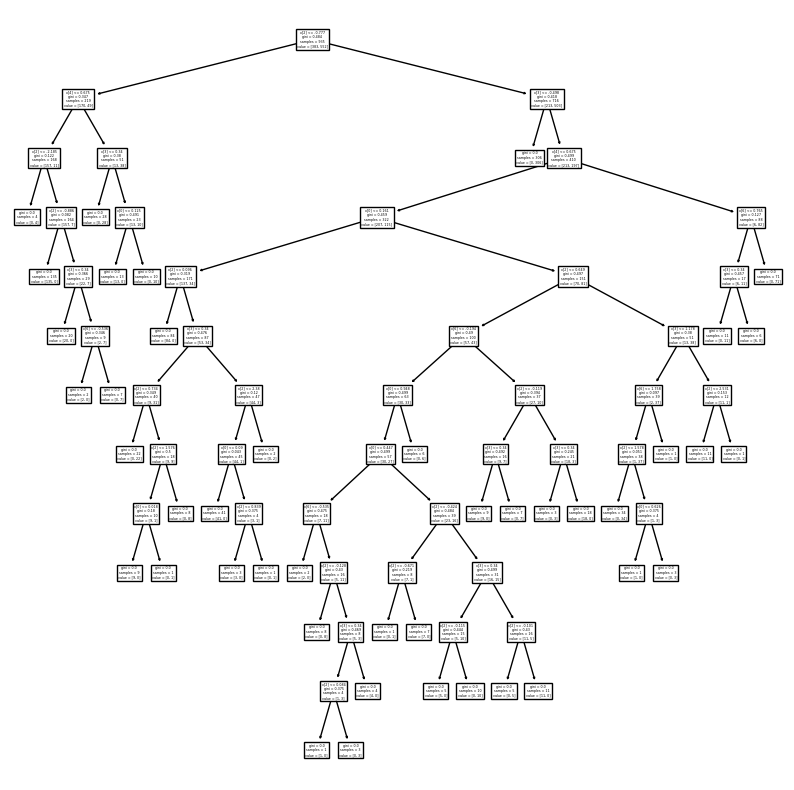

In [49]:
#create a tree 
from sklearn import tree
features=X.columns

plt.figure(figsize=(10,10))
#tree.plot_tree(dt,feature_names=features,filled=True)
tree.plot_tree(dt)
          
plt.show()

In [50]:
#TEst the model with 30% data ,use inbuilt method predict() of
#DecisionTreeClassifier class
Y_pred=dt.predict(X_test)

In [51]:
Y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [52]:
Y_test

629     1
1087    1
283     1
790     1
594     1
       ..
924     0
873     1
731     0
363     0
10      1
Name: insuranceclaim, Length: 402, dtype: int64

In [53]:
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))

[[168   4]
 [  9 221]]


In [54]:
#check classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       172
           1       0.98      0.96      0.97       230

    accuracy                           0.97       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.97      0.97      0.97       402

